In [1]:
import pandas as pd

In [2]:
a=pd.read_csv("seattle-weather.csv")
a

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [5]:
a.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [7]:
a.tail()

,date,precipitation,temp_max,temp_min,wind,weather
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun
1460,2015-12-31,0.0,5.6,-2.1,3.5,sun


In [9]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [11]:
a.shape

(1461, 6)

In [13]:
a.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

# LABEL ENCODER

In [18]:
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
b=LabelEncoder()

In [20]:
aa=b.fit_transform(a["date"])
bb=b.fit_transform(a["weather"])
a["date"]=aa
a["weather"]=bb
a

,date,precipitation,temp_max,temp_min,wind,weather
0,0,0.0,12.8,5.0,4.7,0
1,1,10.9,10.6,2.8,4.5,2
2,2,0.8,11.7,7.2,2.3,2
3,3,20.3,12.2,5.6,4.7,2
4,4,1.3,8.9,2.8,6.1,2
...,...,...,...,...,...,...
1456,1456,8.6,4.4,1.7,2.9,2
1457,1457,1.5,5.0,1.7,1.3,2
1458,1458,0.0,7.2,0.6,2.6,1
1459,1459,0.0,5.6,-1.0,3.4,4


In [22]:
a.corr()

,date,precipitation,temp_max,temp_min,wind,weather
date,1.000000,0.014292,0.145827,0.164249,-0.039163,0.067043
precipitation,0.014292,1.000000,-0.228555,-0.072684,0.328045,-0.267388
temp_max,0.145827,-0.228555,1.000000,0.875687,-0.164857,0.322337
temp_min,0.164249,-0.072684,0.875687,1.000000,-0.074185,0.154981
wind,-0.039163,0.328045,-0.164857,-0.074185,1.000000,-0.065858
weather,0.067043,-0.267388,0.322337,0.154981,-0.065858,1.000000


In [26]:
c=a.drop(["date"],axis="columns")
c

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,0
1,10.9,10.6,2.8,4.5,2
2,0.8,11.7,7.2,2.3,2
3,20.3,12.2,5.6,4.7,2
4,1.3,8.9,2.8,6.1,2
...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,2
1457,1.5,5.0,1.7,1.3,2
1458,0.0,7.2,0.6,2.6,1
1459,0.0,5.6,-1.0,3.4,4


# TRAIN TEST SPLIT

In [29]:
from sklearn.model_selection import train_test_split

In [31]:
d=c.drop(["weather"],axis="columns")
d

,precipitation,temp_max,temp_min,wind
0,0.0,12.8,5.0,4.7
1,10.9,10.6,2.8,4.5
2,0.8,11.7,7.2,2.3
3,20.3,12.2,5.6,4.7
4,1.3,8.9,2.8,6.1
...,...,...,...,...
1456,8.6,4.4,1.7,2.9
1457,1.5,5.0,1.7,1.3
1458,0.0,7.2,0.6,2.6
1459,0.0,5.6,-1.0,3.4


In [35]:
e=c.weather
e

0       0
1       2
2       2
3       2
4       2
       ..
1456    2
1457    2
1458    1
1459    4
1460    4
Name: weather, Length: 1461, dtype: int32

In [37]:
xtrain,xtest,ytrain,ytest=train_test_split(d,e,test_size=0.9)

# LOGISTIC REGRESSION

In [40]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
import warnings
warnings.filterwarnings("ignore")

In [42]:
model.fit(xtrain,ytrain)

LogisticRegression()

In [44]:
model.predict(xtest)

array([2, 2, 2, ..., 2, 4, 4])

In [46]:
model.score(xtest,ytest)

0.7832699619771863

# SVM(SUPPORT VECTOR MACHINE)

In [49]:
from sklearn.svm import SVC
model1=SVC()

In [51]:
model1.fit(xtrain,ytrain)

SVC()

In [53]:
model1.predict(xtest)

array([2, 2, 2, ..., 4, 4, 4])

In [55]:
model1.score(xtest,ytest)

0.7475285171102661

# KERNELS-LINEAR,POLY,RBF

# LINEAR

In [59]:
model2=SVC(kernel="linear")
model2.fit(xtrain,ytrain)

SVC(kernel='linear')

In [63]:
model2.predict(xtest)

array([2, 2, 2, ..., 2, 4, 4])

In [65]:
model2.score(xtest,ytest)

0.8266159695817491

# POLY

In [68]:
model3=SVC(kernel="poly")
model3.fit(xtrain,ytrain)

SVC(kernel='poly')

In [70]:
model3.predict(xtest)

array([2, 2, 2, ..., 4, 4, 4])

In [72]:
model3.score(xtest,ytest)

0.7209125475285171

# RBF

In [75]:
model4=SVC(kernel="rbf")
model4.fit(xtrain,ytrain)

SVC()

In [77]:
model4.predict(xtest)

array([2, 2, 2, ..., 4, 4, 4])

In [79]:
model4.score(xtest,ytest)

0.7475285171102661

# DECISION TREE CLASSIFIER

In [82]:
from sklearn import tree 
from sklearn.preprocessing import LabelEncoder

In [84]:
model5=tree.DecisionTreeClassifier()

In [86]:
model5.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [88]:
model5.predict(xtest)

array([2, 2, 2, ..., 2, 4, 4])

In [90]:
model5.score(xtest,ytest)

0.7741444866920152

# RANDOM FOREST CLASSIFIER

In [93]:
from sklearn.ensemble import RandomForestClassifier
model6=RandomForestClassifier()

In [95]:
model6.fit(xtrain,ytrain)

RandomForestClassifier()

In [97]:
model6.predict(xtest)

array([2, 2, 2, ..., 2, 4, 4])

In [99]:
model6.score(xtest,ytest)

0.8197718631178708

# KNEIGHBORS CLASSIFIER

In [102]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=4)

In [104]:
knn.predict(xtest)

array([2, 2, 2, ..., 2, 4, 4])

In [106]:
knn.score(xtest,ytest)

0.6828897338403042

# NAIVE_BAYES

In [109]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(xtrain,ytrain)

GaussianNB()

In [111]:
classifier.predict(xtest)

array([2, 2, 2, ..., 2, 4, 4])

In [113]:
classifier.score(xtest,ytest)

0.8167300380228137

# XG BOOST

In [116]:
from xgboost import XGBClassifier
model7 = XGBClassifier()

In [118]:
model7.fit(xtrain,ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [120]:
model7.predict(xtest)

array([2, 2, 2, ..., 2, 4, 4], dtype=int64)

In [122]:
model7.score(xtest,ytest)

0.8068441064638783

# CONFUSIN_MATRIX OF LINEAR

In [125]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix

<Figure size 2000x800 with 0 Axes>

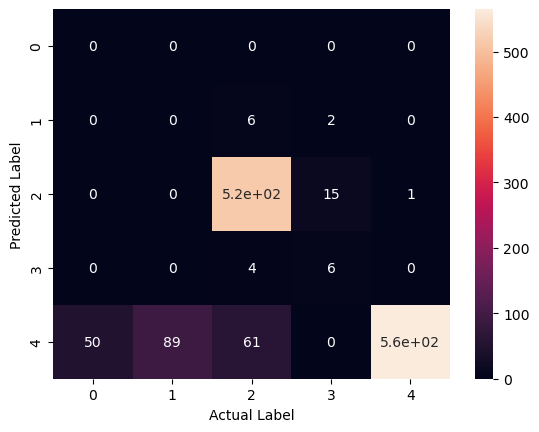

<Figure size 2000x800 with 0 Axes>

In [127]:
h=model2.predict(xtest)
i=confusion_matrix(h,ytest)
import seaborn as sn
sn.heatmap(i,annot=True)
plt.xlabel("Actual Label")
plt.ylabel("Predicted Label")
plt.figure(figsize=(20,8))

# VISUALIZATION

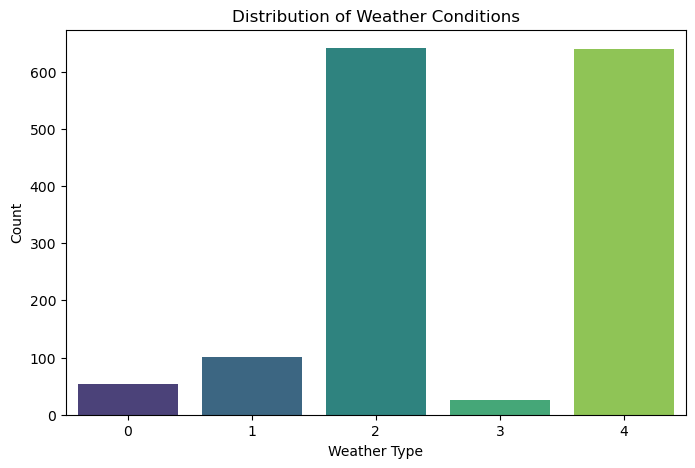

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(data=a, x="weather", palette="viridis")
plt.xlabel("Weather Type")
plt.ylabel("Count")
plt.title("Distribution of Weather Conditions")
plt.show()


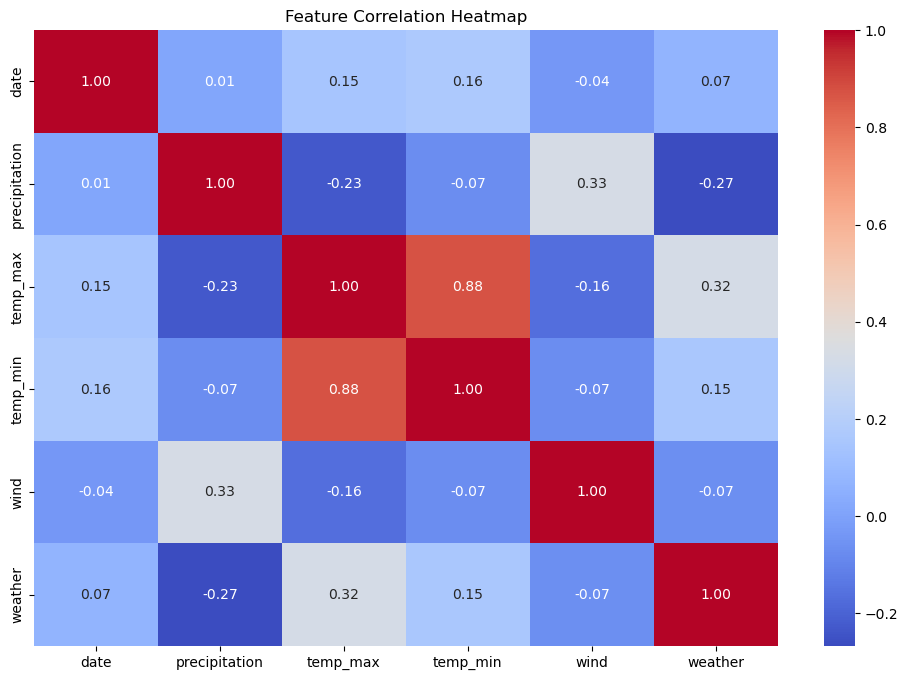

In [138]:
plt.figure(figsize=(12, 8))
sns.heatmap(a.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

Text(0.5, 1.0, 'wind')

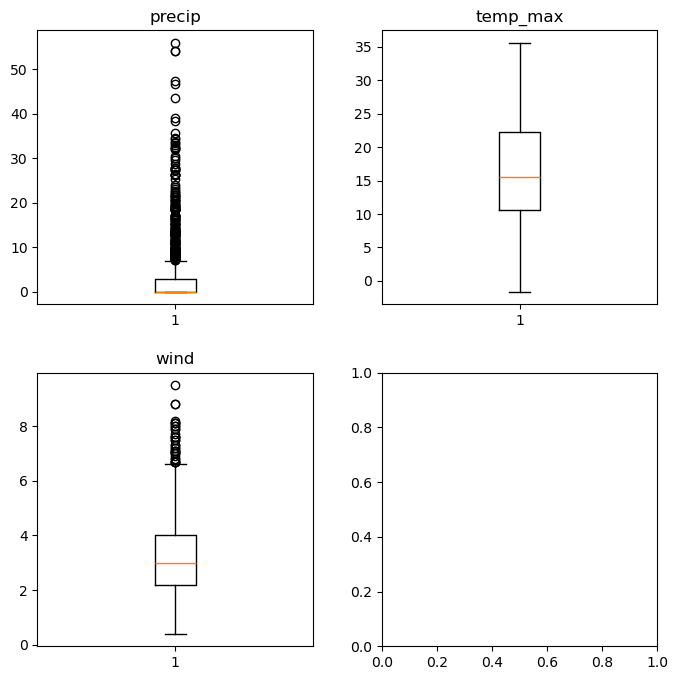

In [148]:
fig, ax = plt.subplots(2,2, figsize = (8,8))
fig.subplots_adjust(wspace = 0.25, hspace = 0.25)

ax[0][0].boxplot(a['precipitation'])
ax[0][0].set_title('precip')

ax[0][1].boxplot(a['temp_max'])
ax[0][1].set_title('temp_max')

ax[1][0].boxplot(a['wind'])
ax[1][0].set_title('wind')